# Week 4

This week we are going to look at a concatenated version of a [dataset](https://datadryad.org/stash/dataset/doi:10.5061/dryad.2h4j5). Let's look at this dataset, after we load up our Libraries

In [92]:
import pandas

#We'll draw a graph later on
import matplotlib.pyplot as plt

#Our 'Machine Learning pieces'
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn import tree

In [93]:
citation_data = pandas.read_csv("week_4_citation_homework.csv")
citation_data

,Journal,Score1,Score2,IF2,IF5,NoOfScores,TopCitation
0,Journal of the American Chemical Society,6,6.0,9.023,8.981,2,0
1,Science,8,10.0,31.377,31.777,2,1
2,Gastroenterology,6,8.0,12.032,12.403,2,0
3,Neuron,8,8.0,14.027,14.927,2,0
4,The Journal of Cell Biology,6,6.0,9.921,10.123,2,0
...,...,...,...,...,...,...,...
1323,Nature Immunology,10,8.0,25.668,25.934,2,0
1324,Molecular and Cellular Biology,8,8.0,6.188,6.381,2,0
1325,RNA (New York),6,6.0,6.051,5.486,2,0
1326,Molecular Biology and Evolution,6,8.0,5.510,8.907,2,0


Our data is 834 lines from the original dataset that represents the top X journals. The columns are:

- Score1
- Score2
- IF2
- IF5
- NoOFScores
- TopCitation - If the citation is among the top 10% this is marked 1, if not 

We are going to build a model to predict how many citations a paper will get based on characteristics

In [94]:
#citation_data = pandas.get_dummies(citation_data, columns=["Journal"])
citation_data.head()

,Journal,Score1,Score2,IF2,IF5,NoOfScores,TopCitation
0,Journal of the American Chemical Society,6,6.0,9.023,8.981,2,0
1,Science,8,10.0,31.377,31.777,2,1
2,Gastroenterology,6,8.0,12.032,12.403,2,0
3,Neuron,8,8.0,14.027,14.927,2,0
4,The Journal of Cell Biology,6,6.0,9.921,10.123,2,0


In [95]:
citation_features = ["Score1","Score2","IF2","IF5","NoOfScores"]
citation_target = citation_data.TopCitation

X = citation_data[citation_features]
y = citation_target

In [98]:
#We'll start with 30 just for fun
test_percent = 20

X_train, X_test, y_train, y_test = train_test_split(X, \
                                                    y, \
                                                    test_size=test_percent/100.0,
                                                   random_state=10)
# Create Decision Tree classifer object
treeClass = DecisionTreeClassifier()

# Train
treeClass = treeClass.fit(X_train,y_train)

#Predict
y_pred = treeClass.predict(X_test)

#Accuracy?
metrics.accuracy_score(y_test,y_pred)

0.8834586466165414

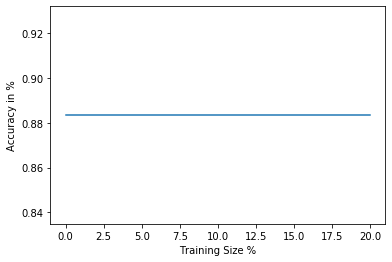

In [99]:
testing_percents = [80,90,100]
accuracy = []
training_percents = []

for test_ratio in testing_percents:
    X_train, X_test, y_train, y_test = train_test_split(X, \
                                                        y, \
                                                        test_size=test_percent/100.0,
                                                        random_state=10)
    treeClassTest = DecisionTreeClassifier()
    treeClassTest = treeClassTest.fit(X_train,y_train)
    y_pred = treeClassTest.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    accuracy.append(score)
    training_percents.append(100 - test_ratio)

    
plt.plot(training_percents,accuracy)
plt.ylabel("Accuracy in %")
plt.xlabel("Training Size %")
plt.show()

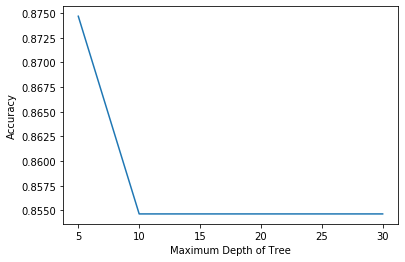

In [85]:
test_percent = 30
max_options = [5,10,15,20,25,30]

accuracy = []
tree_max = []

for max_d in max_options:
    X_train, X_test, y_train, y_test = train_test_split(X, \
                                                        y, \
                                                        test_size=test_percent/100.0,
                                                        random_state=10,
                                                       )
    
    #We set maximum depth in the DecisionTreeClassifer when we first create the variable
    treeClassTest = DecisionTreeClassifier(max_depth=max_d)
    treeClassTest = treeClassTest.fit(X_train,y_train)
    y_pred = treeClassTest.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    accuracy.append(score)
    tree_max.append(max_d)

    
plt.plot(max_options,accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Maximum Depth of Tree")
plt.show()